In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle 
import os 

# Color map
colors = ['maroon','coral',#'wheat',
          'gold','olivedrab',#'palegreen','teal',
          'lightslategray',#'palevioletred',
          'midnightblue','plum','olive']

cmap = plt.get_cmap('tab10')
colors = cmap.colors

# sample_sizes = [20,50,100,
#                  200,
#                 500,550,580,600,610,620,630,
#                 640,
#                 650,
#                 700,
#                 750,
#                 800,1000,1500,2000,3000,4000,6000,8000
# ]

sample_sizes = [
                20,
                50,100,200,500,
                #550,580,600,610,620,630,
                640,
                #650,
                700,
                750,
                800,
                1000,
                1500,
                2000,
                3000,
                4000,
                6000,
                8000,
                ]


/Users/aubinramon/opt/anaconda3/envs/abnativ/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aubinramon/opt/anaconda3/envs/abnativ/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/aubinramon/opt/anaconda3/envs/abnativ/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/aubinramon/opt/anaconda3/envs/abnativ/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/aubinramon/opt/anaconda3/envs/abnativ/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rco

(128, 11)
Index(['score', 'Embeddings', 'sample_size', 'train_mean_spearman',
       'train_std_spearman', 'test_mean_spearman', 'test_std_spearman',
       'train_spearman_upper_bound', 'train_spearman_lower_bound',
       'test_spearman_upper_bound', 'test_spearman_lower_bound'],
      dtype='object')
ESM-2-L1 Intrinsic solubility score
[(20, 0.533), (50, 0.735), (100, 0.805), (200, 0.826), (500, 0.845), (640, 0.848), (700, 0.849), (750, 0.849), (800, 0.849), (1000, 0.852), (1500, 0.857), (2000, 0.859), (3000, 0.864), (4000, 0.867), (6000, 0.871), (8000, 0.873)]
ESM-2-L1 Structurally corrected solubility
[(20, 0.425), (50, 0.595), (100, 0.611), (200, 0.649), (500, 0.677), (640, 0.685), (700, 0.687), (750, 0.687), (800, 0.69), (1000, 0.691), (1500, 0.702), (2000, 0.707), (3000, 0.714), (4000, 0.72), (6000, 0.727), (8000, 0.73)]
ESM-2-L15 Intrinsic solubility score
[(20, 0.372), (50, 0.51), (100, 0.725), (200, 0.824), (500, 0.873), (640, 0.887), (700, 0.891), (750, 0.893), (800, 0.896)

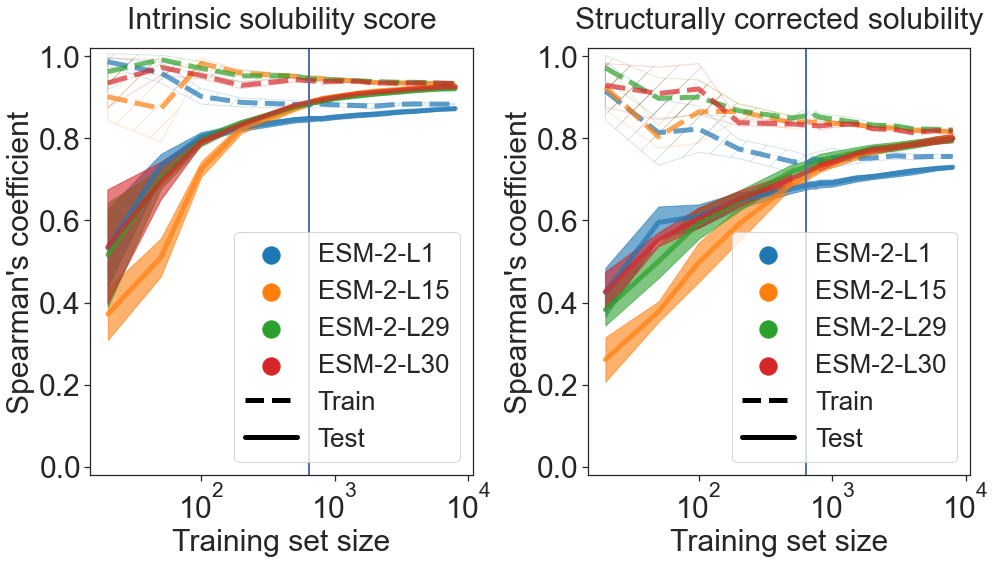

In [7]:
reg = 'ridge'
csv_path = "data/camsol_ridge.csv"
perf_df = pd.read_csv(csv_path)

# Embedding name for plotting
mapping_dict = {'onehot': 'One-hot', 
                'esm_msa1b': 'esm_msa1b', 
                'esm1b': 'ESM-1b',
                'esm2_t6': 'esm2_t6',
                'esm2_t12': 'esm2_t12',
                'esm2_t30': 'ESM-2-L30',
                'esm2_t33': 'esm2_t33',
                'esm2_t36': 'esm2_t36',
                'antiberty': 'AntiBERTy',
                'ablang': 'AbLang',
                'nanobert': 'nanoBERT',
                'nanobuilder': 'NanobodyBuilder2',
                'vhse': 'VHSE',
                'esm2_t30_l1': 'ESM-2-L1',
                'esm2_t30_l15': 'ESM-2-L15',
                'esm2_t30_l29': 'ESM-2-L29'
                }

perf_df['embedding'] = perf_df['embedding'].map(mapping_dict)
perf_df = perf_df.replace('solubility_score','Intrinsic solubility score')
perf_df = perf_df.replace('zsurf_score','Structurally corrected solubility')

# Define embeddings for plotting
# embed_methods = ['One-hot',
#                  'VHSE',
#                  'ESM-1b', 
#                  'ESM-2',
#                  'AntiBERTy',
#                  'AbLang',
#                  'nanoBERT',
#                  'NanobodyBuilder2']

embed_methods = [
                 
                 'ESM-2-L1',
                 'ESM-2-L15',
                 'ESM-2-L29',
                 'ESM-2-L30',]




list_scores, list_embeds, list_sizes = [], [], []
list_mean_spearman_train, list_std_spearman_train = [], []
list_mean_spearman_test, list_std_spearman_test = [], []

scores = ['Intrinsic solubility score','Structurally corrected solubility']
for score in scores:
    for embed in embed_methods:
        for size in sample_sizes:
            filtered_df = perf_df[(perf_df['score']==score) & (perf_df['embedding']==embed) & (perf_df['sample_size']==size)]
            mean_spearman_train = np.mean(filtered_df['spearman_train'].values)
            std_spearman_train = np.std(filtered_df['spearman_train'].values)
            mean_spearman_test = np.mean(filtered_df['spearman_test'].values)
            std_spearman_test = np.std(filtered_df['spearman_test'].values)

            list_scores.append(score)
            list_embeds.append(embed)
            list_sizes.append(size)
            list_mean_spearman_train.append(mean_spearman_train)
            list_std_spearman_train.append(std_spearman_train)
            list_mean_spearman_test.append(mean_spearman_test)
            list_std_spearman_test.append(std_spearman_test)

df_to_plot = {'score': list_scores,
              'Embeddings': list_embeds,
              'sample_size': list_sizes,
              'train_mean_spearman': list_mean_spearman_train,
              'train_std_spearman': list_std_spearman_train,
              'test_mean_spearman': list_mean_spearman_test,
              'test_std_spearman': list_std_spearman_test}
df_to_plot = pd.DataFrame(df_to_plot)

train_spearman_upper_bound = [df_to_plot['train_mean_spearman'][i]+df_to_plot['train_std_spearman'][i] for i in range(len(df_to_plot))]
train_spearman_lower_bound = [df_to_plot['train_mean_spearman'][i]-df_to_plot['train_std_spearman'][i] for i in range(len(df_to_plot))]
df_to_plot['train_spearman_upper_bound'] = train_spearman_upper_bound
df_to_plot['train_spearman_lower_bound'] = train_spearman_lower_bound

test_spearman_upper_bound = [df_to_plot['test_mean_spearman'][i]+df_to_plot['test_std_spearman'][i] for i in range(len(df_to_plot))]
test_spearman_lower_bound = [df_to_plot['test_mean_spearman'][i]-df_to_plot['test_std_spearman'][i] for i in range(len(df_to_plot))]
df_to_plot['test_spearman_upper_bound'] = test_spearman_upper_bound
df_to_plot['test_spearman_lower_bound'] = test_spearman_lower_bound
print(df_to_plot.shape)
print(df_to_plot.columns)

sns.set_theme(style='white')
fig, axs = plt.subplots(1,2,figsize=(14, 8))
for j in range(len(embed_methods)):
    embed = embed_methods[j]
    df_to_plot_fil = df_to_plot[df_to_plot['Embeddings']==embed]
    
    for i in range(len(scores)):
        score = scores[i]
        score_df = df_to_plot_fil[df_to_plot_fil['score']==score]
        sample, spearmans, embeddings = [], [], []
        data_type = []
        sample.extend(score_df['sample_size'].values)
        sample.extend(score_df['sample_size'].values)
        spearmans.extend(score_df['test_mean_spearman'].values)
        spearmans.extend(score_df['train_mean_spearman'].values)
        embeddings.extend(score_df['Embeddings'].values)
        embeddings.extend(score_df['Embeddings'].values)
        data_type.extend(['test']*len(score_df['sample_size']))
        data_type.extend(['train']*len(score_df['sample_size']))
        data_df = {'sample_size':sample, 'spearman': spearmans, 'Embeddings':embeddings, 'Data': data_type}
        data_df['Data'] = [i.capitalize() for i in data_type]
        print(embed, score)
        print([(x,round(i,3)) for x,i in zip(score_df['sample_size'].values,score_df['test_mean_spearman'].values)])

        sns.lineplot(data=data_df, x='sample_size', y='spearman', style='Data', color=colors[j], linewidth = 5, ax = axs[i], legend=False, alpha=0.7)
        axs[i].scatter([], [], color=colors[j], s=300, label=embed)


        if j == len(embed_methods) -1 :
            axs[i].plot([], [], color='black', linestyle="--", linewidth=5, label='Train')
            axs[i].plot([], [], color='black', linestyle="-", linewidth=5, label='Test')

        axs[i].vlines(640, ymin=-1, ymax=2)

        axs[i].fill_between(score_df['sample_size'].tolist(), score_df['train_spearman_upper_bound'].tolist(), score_df['train_spearman_lower_bound'].tolist(), color=colors[j], alpha=.2, hatch='/', facecolor='none')
        axs[i].fill_between(score_df['sample_size'].tolist(), score_df['test_spearman_upper_bound'].tolist(), score_df['test_spearman_lower_bound'].tolist(), color=colors[j], alpha=.6)
        axs[i].set_ylim(-0.02,1.02)
        axs[i].set_xscale('log')
        title = score
        axs[i].set_title(title,fontsize=30,y=1.01, pad=15)
        axs[i].set_xlabel('Training set size',fontsize=30)
        axs[i].set_ylabel("Spearman's coefficient",fontsize=30)
        if j==7:
            legend = axs[i].legend(loc='upper right', ncol=1, fontsize=26)
        else: legend = axs[i].legend(loc='lower right', ncol=1, fontsize=26)
        legend.get_title().set_fontsize('26') 
        axs[i].tick_params(bottom=True, left=True, labelsize=30)

plt.tight_layout()
plt.savefig(os.path.join('figures', 'figureS16.png'), dpi=800, bbox_inches='tight', transparent=True)
plt.show()
	